In [7]:
import torch
import torch.nn as nn
from torch.nn import functional as fn
from torch.autograd import Variable
import matplotlib
import torch.nn.functional as F 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
import plotly 
import sklearn
#plotly.tools.set_credentials_file(username='mishra40', api_key='nuOxcWWzZSBv7dFtO4F3')
import chart_studio.plotly as py
import plotly.graph_objs as go
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())
print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())

__Python VERSION: 3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
__pyTorch VERSION: 1.1.0
__CUDA VERSION
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2015 NVIDIA Corporation
Built on Tue_Aug_11_14:27:32_CDT_2015
Cuda compilation tools, release 7.5, V7.5.17
__CUDNN VERSION: 7501
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0


In [3]:
train_xyz = []
nverts=30

with open('training/nb_blocks/b4_10_Ob/data.pickle', 'rb') as f:
    data = pickle.load(f)
    
for i in range(len(data)):
    obj = np.asarray(data[i])
#     print("obj[0]: ", obj[0])
#     print("len obj[0][0]: ", len(obj[0][0]))
    pad = nverts - len(obj[0][0])
    m = nn.ZeroPad2d((0, pad, 0, 0)) #padding(left,right,top,bottom)
    coords = m(torch.tensor(obj[0]))
    train_xyz.append(coords)
        
    
train_xyz = np.stack(train_xyz)   
train_xyz.shape        

(10, 3, 30)

In [4]:
train_xyz

array([[[-1.81850076e-01, -1.92799419e-01, -1.81850076e-01,
         -1.92799419e-01,  1.81850076e-01,  1.92799419e-01,
          1.81850076e-01,  1.92799419e-01,  2.40170181e-01,
          2.40723968e-01,  2.40170181e-01,  2.40723968e-01,
         -2.40170181e-01, -2.40723968e-01, -2.40170181e-01,
         -2.40723968e-01,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          2.45127991e-01,  2.58867711e-01, -2.58867711e-01,
         -2.45127991e-01,  1.80509582e-01,  1.96687311e-01],
        [ 7.04150088e-03, -7.45917391e-03,  7.03995302e-03,
         -7.46088102e-03,  7.04150088e-03, -7.45917391e-03,
          7.03995302e-03, -7.46088102e-03,  1.15518244e-02,
         -1.21288458e-02,  1.15498761e-02, -1.21312281e-02,
          1.15518244e-02, -1.21288458e-02,  1.15498761e-02,
         -1.21312281e-02,  7.28876190e-03, -7.59038376e-03,
          7.29020359e-03, -7.58873438e-

In [5]:
features=train_xyz
label = np.full((10,1),4)

In [6]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output


ValueError: Found array with dim 3. Estimator expected <= 2.

In [335]:
train_xy_obj = [] #torch.Tensor()
train_xy_conn = []
objs = []

with open('training/vverts/cube/data.pickle', 'rb') as f:
    data = pickle.load(f)

for i in range(len(data)):
    if(i%2 > 0):
        continue
    obj = np.asarray(data[i])
    #print("obj: ", obj)
    print("obj shape: ", obj.shape)
    objs.append(np.copy(obj))
    
    vv = obj.shape[1]
    obj[2,0:vv]=0
    vverts = torch.from_numpy(np.asarray(obj,dtype=np.float32))
    vverts = vverts.unsqueeze(0)
    pad = nverts - vv
    m = nn.ZeroPad2d((0, pad, 0, 0)) #padding(left,right,top,bottom)
    x = m(vverts)
    train_xy_obj.append(x)    
    
    conn = np.asarray(data[i+1]) 
    conn = torch.from_numpy(np.asarray(conn,dtype=np.float32))
    conn = conn.unsqueeze(0)
    #print("conn: ", conn)
    print("conn shape: ", conn.shape)
    conn_mat = restructure_conn_mat(8-vv,vv,conn)
#    print("hidden conn mat: ", conn_mat)
    print("restrcutured conn shape: ", conn_mat.shape)
    conn_mat = expand_conn_mat(nverts,8,conn_mat)
#     print("expanded conn mat: ", conn_mat)  
    print("conn shape: ", conn_mat.shape)
    train_xy_conn.append(conn_mat)


train_xy_obj = torch.cat(train_xy_obj)
print(train_xy_obj.shape)

train_xy_conn = torch.cat(train_xy_conn)
print(train_xy_conn.shape)

obj shape:  (3, 6)
conn shape:  torch.Size([1, 3, 15])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 6)
conn shape:  torch.Size([1, 3, 15])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
c

conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 8)
conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 8)
conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 8)
conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 6)
conn shape:  torch.S

conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 6)
conn shape:  torch.Size([1, 3, 15])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 8)
conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.S

conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 8)
conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.S

conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 8)
conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 6)
conn shape:  torch.Size([1, 3, 15])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 8)
conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 6)
conn shape:  torch.Size([1, 3, 15])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 8)
conn shape:  torch.S

conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 6)
conn shape:  torch.Size([1, 3, 15])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 8)
conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 6)
conn shape:  torch.Size([1, 3, 15])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 6)
conn shape:  torch.S

conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 8)
conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 6)
conn shape:  torch.Size([1, 3, 15])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 8)
conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 7)
conn shape:  torch.Size([1, 3, 21])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 8)
conn shape:  torch.Size([1, 3, 28])
restrcutured conn shape:  torch.Size([1, 3, 28])
conn shape:  torch.Size([1, 3, 28])
obj shape:  (3, 6)
conn shape:  torch.S

In [348]:
import plotly.graph_objs as go

obj = objs[10]

x = obj[0]
y = obj[1]
z = obj[2]

print(x,y,z)

# trace = go.Mesh3d(x=x,y=y,z=z,color='#0066FF',opacity=0.80)
# py.iplot([trace])

trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.5
        ),
        opacity=0.8
    )
)

data = [trace]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

IndexError: list index out of range

In [32]:
import plotly.graph_objs as go

obj = objs[0]

x = obj[0]
y = obj[1]
z = obj[2]

print(x,y,z)


trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.5
        ),
        opacity=0.8
    )
)

data = [trace]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

[-1. -1. -1.  1.  1.  1.  1.] [-0.99999636  0.99999636 -1.00000358  1.00000358 -0.99999636  0.99999636
 -1.00000358] [-1.00000358  1.00000358  0.99999636 -0.99999636 -1.00000358  1.00000358
  0.99999636]


Training #1

In [47]:
train_xy_obj = [] #torch.Tensor()
train_xy_conn = []

with open('training/vverts/r_25_30/data.pickle', 'rb') as f:
    data = pickle.load(f)

for i in range(len(data)):
    if(i%2 > 0):
        continue
    obj = np.asarray(data[i])
    #print("obj: ", obj)
    #print("obj shape: ",obj.shape)
    
    vv = obj.shape[1]
    obj[2,0:vv]=np.random.rand(vv)
    vverts = torch.from_numpy(np.asarray(obj,dtype=np.float32))
    vverts = vverts.unsqueeze(0)
    pad = nverts - vv
    m = nn.ZeroPad2d((0, pad, 0, 0)) #padding(left,right,top,bottom)
    x = m(vverts)
    train_xy_obj.append(x)    
    
    conn = np.asarray(data[i+1]) 
    conn = torch.from_numpy(np.asarray(conn,dtype=np.float32))
    conn = conn.unsqueeze(0)
    
    conn_mat = restructure_conn_mat(3,vv,conn)
    print("hidden conn mat: ", conn_mat)
    print("conn shape: ", conn_mat.shape)
    conn_mat = expand_conn_mat(nverts,vv,conn_mat)
    print("expanded conn mat: ", conn_mat)  
    print("conn shape: ", conn_mat.shape)
    
    
    #print("conn: ", conn)
    #print("conn shape: ",conn.shape)
    #conn_mat = expand_conn_mat(nverts,vv,conn)
    #print("conn mat: ", conn_mat)    
    train_xy_conn.append(conn_mat)


train_xy_obj = torch.cat(train_xy_obj)
print(train_xy_obj.shape)

train_xy_conn = torch.cat(train_xy_conn)
print(train_xy_conn.shape)

AssertionError: input is too small

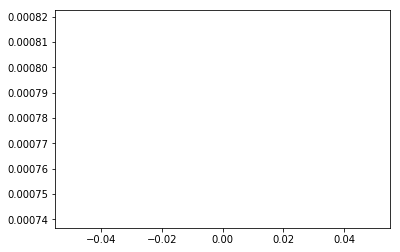

In [64]:
plt.plot(train_accum[0:5]);

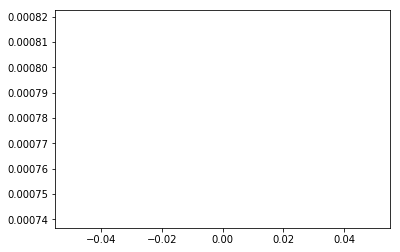

In [65]:
plt.plot(train_accum[0:5]);

In [503]:
train_accum

[0.0009727848519105464]

In [8]:
# Block Object
test_xy_Block_obj = []
test_xy_Block_conn = []
objs = []

with open('test/Block1/Obj1/data.pickle', 'rb') as f:
    data = pickle.load(f)

for i in range(len(data)):
    if(i%2 > 0):
        continue
    obj = np.asarray(data[i]) 
    #print(obj)
    vv = obj.shape[1]
    print("vverts:",vv)
    objs.append(np.copy(obj))
    
    obj[2,0:vv]= np.random.rand(vv)
    #print(obj)
    vverts = torch.from_numpy(np.asarray(obj,dtype=np.float32))
    vverts = vverts.unsqueeze(0)
    pad = nverts - vv
    m = nn.ZeroPad2d((0, pad, 0, 0))
    x = m(vverts)
    test_xy_Block_obj.append(x)    

    conn = np.asanyarray(data[i+1])    
    #print(conn)
    conn = torch.from_numpy(np.asarray(conn,dtype=np.float32))
    conn = conn.unsqueeze(0)
    conn_mat = expand_conn_mat(nverts,vv,conn)
    
#     conn_mat = restructure_conn_mat(3,vv,conn)
#     print("hidden conn mat: ", conn_mat)
#     print("conn shape: ", conn_mat.shape)
#     conn_mat = expand_conn_mat(nverts,vv,conn_mat)
#     print("expanded conn mat: ", conn_mat)  
#     print("conn shape: ", conn_mat.shape)
    
    print("vverts:",vv)
    conn_mat = restructure_conn_mat(15-vv,vv,conn)
#   print("hidden conn mat: ", conn_mat)
    print("restrcutured conn shape: ", conn_mat.shape)
    conn_mat = expand_conn_mat(nverts,15,conn_mat)
#   print("expanded conn mat: ", conn_mat)  
    print("conn shape: ", conn_mat.shape)
    test_xy_Block_conn.append(conn_mat)

    
test_xy_Block_obj = torch.cat(test_xy_Block_obj)
test_xy_Block_conn = torch.cat(test_xy_Block_conn)

vverts: 9


NameError: name 'expand_conn_mat' is not defined

In [214]:
from numpy import linalg as LA
msda = []
l2_norm = []
n = test_xy_Block_obj.shape[0]
for i in range(n):
    print(i)
    obj = torch.Tensor(test_xy_Block_obj[i].unsqueeze(0)).to(device)
    conn = torch.Tensor(test_xy_Block_conn[i].unsqueeze(0)).to(device)
    output = model.forward(obj, conn)
    print(output)
    msda.append(torch.norm(output))  
    if (i == 0):
        origin = output
        print(origin)
    else:    
        l2_norm.append(torch.norm(origin - output))


# l2_norm = torch.stack(l2_norm,dim=0)
# print("l2 norm diffs:", l2_norm)
# print("l2 norm diffs mean:", torch.mean(l2_norm))
# print("l2 norm std:", torch.std(l2_norm))

#msda = torch.stack(msda,dim=0)
print("msda: ", msda)
print("msda mean: ", torch.mean(msda))
print("msda std:", torch.std(msda))

0
tensor(nan., device='cuda:0')
tensor(nan., device='cuda:0')
1
tensor(nan., device='cuda:0')
2
tensor(nan., device='cuda:0')
3
tensor(nan., device='cuda:0')
4
tensor(nan., device='cuda:0')
5
tensor(nan., device='cuda:0')
6
tensor(nan., device='cuda:0')
7
tensor(nan., device='cuda:0')
8
tensor(nan., device='cuda:0')
9
tensor(nan., device='cuda:0')
10
tensor(nan., device='cuda:0')
msda:  [tensor(nan., device='cuda:0'), tensor(nan., device='cuda:0'), tensor(nan., device='cuda:0'), tensor(nan., device='cuda:0'), tensor(nan., device='cuda:0'), tensor(nan., device='cuda:0'), tensor(nan., device='cuda:0'), tensor(nan., device='cuda:0'), tensor(nan., device='cuda:0'), tensor(nan., device='cuda:0'), tensor(nan., device='cuda:0')]


TypeError: mean(): argument 'input' (position 1) must be Tensor, not list

In [276]:
model.forward(torch.Tensor(test_xy_Block_obj[1].unsqueeze(0)).to(device), 
              torch.Tensor(test_xy_Block_conn[1].unsqueeze(0)).to(device), extract_z=True)

z output vec: tensor([[ 0.0000,  0.0000,  0.0354,  0.0000,  0.0876,  0.0000,  0.1072,
          0.0000,  0.9792,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.1131,  0.9792,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.3498,
          0.0000,  0.2203,  0.1131,  0.9792,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.3049,  0.0000,  0.0000,  0.3753,  0.2203,  0.1131,  0.9792,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.4629,  0.3753,  0.2203,
          0.1131,  0.9792,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.1995,  0.0000,  0.0000,  0.4898,  0.4629,  0.3753,
          0.2203,  0.1131,  0.9792,  0.0000,  0.00

tensor([[ 0.1294,  0.1019,  0.1049,  0.0869, -0.1282, -0.1263,  0.0137,
          0.1621,  0.0109, -0.0384, -0.0041,  0.0306, -0.0074,  0.0242,
          0.0017,  0.0255,  0.0139, -0.0010,  0.0070,  0.0113]], device='cuda:0')

In [277]:
test_xy_Block_obj[1]

tensor([[-0.6877, -0.6234, -0.6877,  0.2228,  0.6234, -0.2228,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.7454,  0.6785, -0.7454,  0.7233,  0.6785,  0.7233,  0.7597,
          0.7775, -0.8284,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.4198,  0.4961,  0.5252,  0.4898,  0.4629,  0.3753,  0.2203,
          0.1131,  0.9792,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])

In [282]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

x = [-0.6877, -0.6234, -0.6877,  0.2228,  0.6234, -0.2228] #obj[0]

y = [-0.7454,  0.6785, -0.7454,  0.7233,  0.6785,  0.7233,  0.7597] #obj[1]

z = [ 0.4198,  0.4961,  0.5252,  0.4898,  0.4629,  0.3753,  0.2203] #obj[2]

#x=[(i-min(x))/(max(x)-min(x)) for i in x]

#y=[(i-min(y))/(max(y)-min(y)) for i in y]

#z=[(i-min(z))/(max(z)-min(z)) for i in z]

#verts = [list(zip(x, y,z))]
#x,y,z=zip(*verts)

# trace = go.Mesh3d(x=x,y=y,z=z,color='#0066FF',opacity=0.80)
# py.iplot([trace])

trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.5
        ),
        opacity=0.8
    )
)

data = [trace]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')


In [283]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

x = [-0.6877, -0.6234, -0.6877,  0.2228,  0.6234, -0.2228] #obj[0]

y = [-0.7454,  0.6785, -0.7454,  0.7233,  0.6785,  0.7233,  0.7597] #obj[1]

z = [ 0.1294,  0.1019,  0.1049,  0.0869, -0.1282, -0.1263,  0.0137] #obj[2]

#x=[(i-min(x))/(max(x)-min(x)) for i in x]

#y=[(i-min(y))/(max(y)-min(y)) for i in y]

#z=[(i-min(z))/(max(z)-min(z)) for i in z]

#verts = [list(zip(x, y,z))]
#x,y,z=zip(*verts)

# trace = go.Mesh3d(x=x,y=y,z=z,color='#0066FF',opacity=0.80)
# py.iplot([trace])

trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.5
        ),
        opacity=0.8
    )
)

data = [trace]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')


In [256]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

x = obj[0]

y = obj[1]

z =  [ 0.0021,  0.0070,  0.0029, -0.0040, -0.0219,  0.0576, -0.0570,
          0.0657, -0.1073 ]

#x=[(i-min(x))/(max(x)-min(x)) for i in x]

#y=[(i-min(y))/(max(y)-min(y)) for i in y]

#z=[(i-min(z))/(max(z)-min(z)) for i in z]

#verts = [list(zip(x, y,z))]
#x,y,z=zip(*verts)

trace = go.Mesh3d(x=x,y=y,z=z,color='#0066FF',opacity=0.50)
py.iplot([trace])

TEST BY RENDERING

In [102]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
    
def test_reconstruct(N):
    print(N)
    print("******************************")
    fig = plt.figure()
    ax = Axes3D(fig)

    test_obj=test_xyz[N,:,:]
    d,t = test_obj.size()
    obj,conn = torch.Tensor.split(test_obj,[8,t-8],dim=1)
    #print(obj)
    #print(conn)
    fullobj = np.concatenate((obj,conn), axis=1)
    computed_z = model.forward(torch.Tensor([fullobj]).to(device), extract_z=True)
    orig_z = obj[2]


    print("_________ORIG________")

    x=obj[0]
    y=obj[1]
    z=obj[2]


    x=[(i-min(x))/(max(x)-min(x)) for i in x]
    y=[(i-min(y))/(max(y)-min(y)) for i in y]
    z=[(i-min(z))/(max(z)-min(z)) for i in z]

    verts = [list(zip(x, y,z))]
    #ax.add_collection3d(Poly3DCollection(verts))
    ax.scatter(x, y, z, c='r', marker='o')
    plt.show()


    print("_________RECON________")

    fig = plt.figure()
    ax = Axes3D(fig)
    x=obj[0]
    y=obj[1]
    z=computed_z.to('cpu').detach().numpy()[0]
    #print("Test  obj's   z: ", obj[2])
    #print("Model computed z:", z)

    x=[(i-min(x))/(max(x)-min(x)) for i in x]
    y=[(i-min(y))/(max(y)-min(y)) for i in y]
    z=[(i-min(z))/(max(z)-min(z)) for i in z]

    verts = [list(zip(x, y,z))]
    #ax.add_collection3d(Poly3DCollection(verts))
    ax.scatter(x, y, z, c='r', marker='o')
    plt.show()



In [103]:
N=[15,]

50
******************************
z output vec: tensor([[-1.0672, -0.9106, -2.5564, -0.0000, -1.0795, -0.9229, -2.5688,
          0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  1.9512,
          0.0000,  0.0000, -0.0000,  2.3076, -0.0005,  0.0007,  0.0023,
          0.0009,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]], device='cuda:0')
_________ORIG________


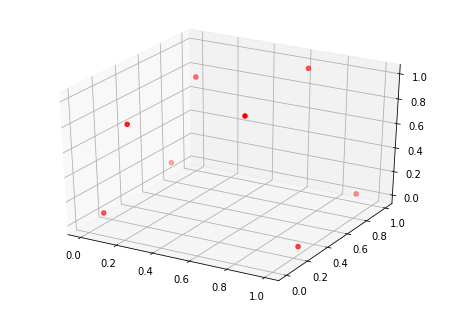

_________RECON________


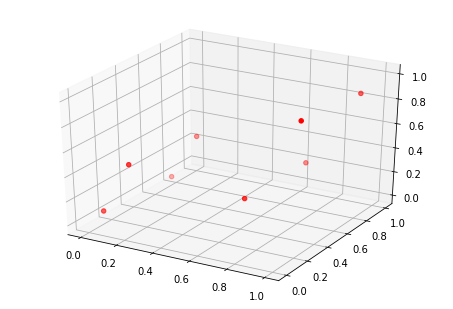

51
******************************
z output vec: tensor([[-0.8605, -1.3156, -2.5164, -0.0000, -0.8729, -1.3280, -2.5287,
          0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  1.5594,
          0.0000, -0.0000,  0.0000,  1.9158, -0.0004,  0.0012,  0.0027,
          0.0009,  0.0000,  0.0000, -0.0000,  0.0000,  0.0000,  0.0000]], device='cuda:0')
_________ORIG________


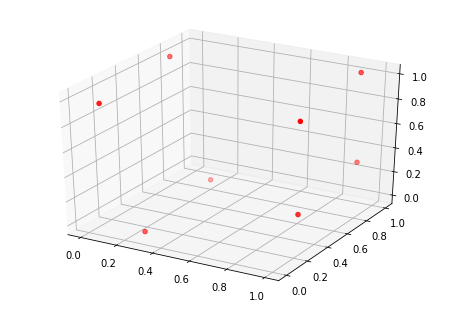

_________RECON________


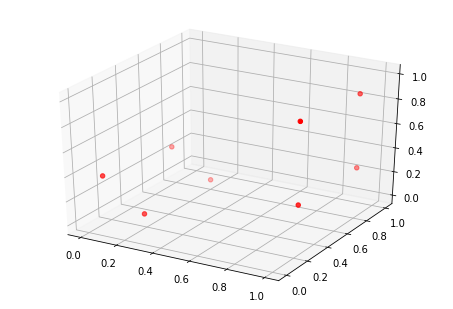

52
******************************
z output vec: tensor([[-1.4830, -0.8673, -2.5564, -0.0000, -1.4954, -0.8796, -2.5688,
          0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  1.6242,
          0.0000,  0.0000, -0.0000,  1.9806, -0.0005, -0.0001,  0.0023,
          0.0009, -0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]], device='cuda:0')
_________ORIG________


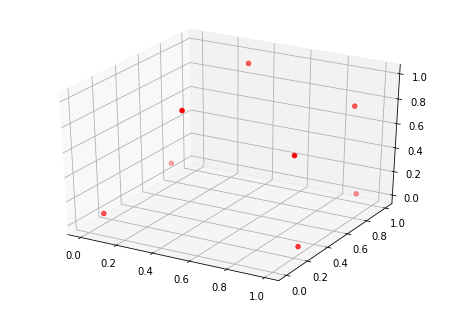

_________RECON________


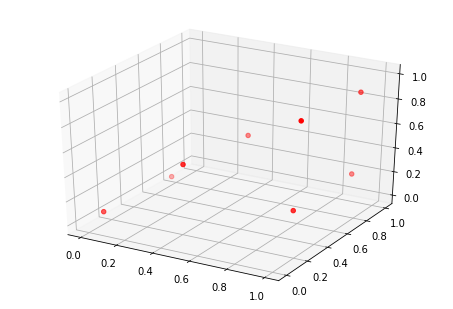

53
******************************
z output vec: tensor([[-0.8074, -1.3263, -2.5164, -0.0000, -0.8198, -1.3387, -2.5287,
          0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  2.0766,
          0.0000, -0.0000,  0.0000,  2.4329, -0.0003,  0.0020,  0.0027,
          0.0009,  0.0000,  0.0000, -0.0000,  0.0000,  0.0000,  0.0000]], device='cuda:0')
_________ORIG________


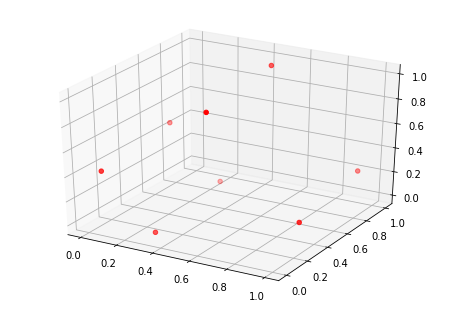

_________RECON________


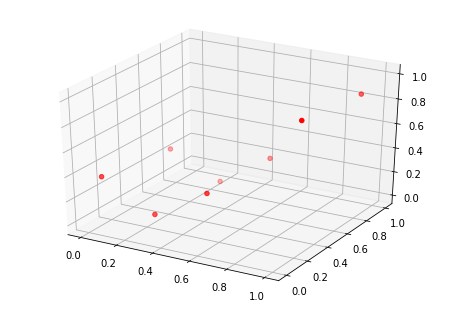

54
******************************
z output vec: tensor([[-1.0864, -1.4373, -2.5024, -0.0000, -1.0988, -1.4497, -2.5147,
          0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  1.7854,
          0.0000, -0.0000,  0.0000,  2.1418, -0.0006,  0.0006,  0.0026,
          0.0009,  0.0000,  0.0000, -0.0000,  0.0000,  0.0000,  0.0000]], device='cuda:0')
_________ORIG________


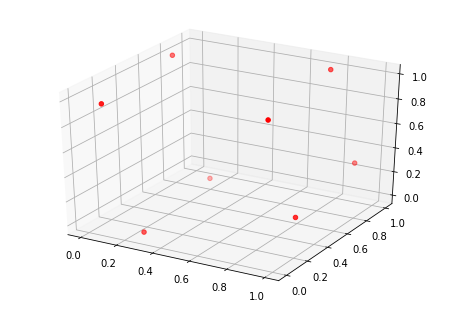

_________RECON________


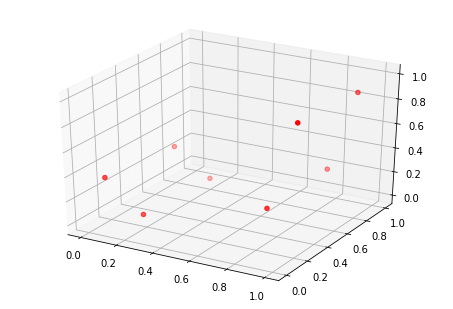

55
******************************
z output vec: tensor([[-1.2926, -0.8458, -2.5612, -0.0000, -1.3049, -0.8582, -2.5736,
          0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  1.6991,
          0.0000,  0.0000, -0.0000,  2.0555, -0.0005,  0.0002,  0.0021,
          0.0009, -0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]], device='cuda:0')
_________ORIG________


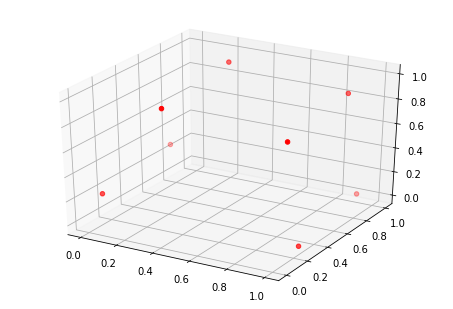

_________RECON________


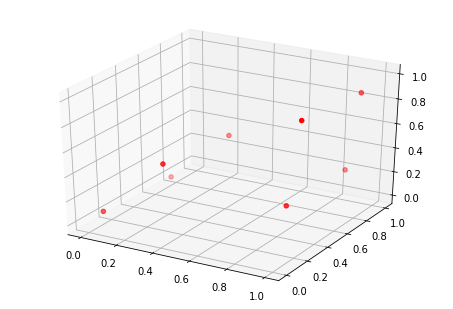

56
******************************
z output vec: tensor([[-1.0672, -0.9106, -2.5564, -0.0000, -1.0795, -0.9229, -2.5688,
          0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  1.9512,
          0.0000,  0.0000, -0.0000,  2.3076, -0.0005,  0.0007,  0.0023,
          0.0009,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]], device='cuda:0')
_________ORIG________


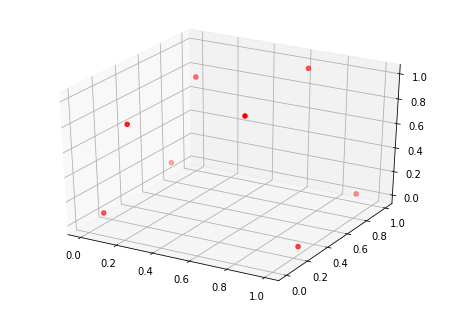

_________RECON________


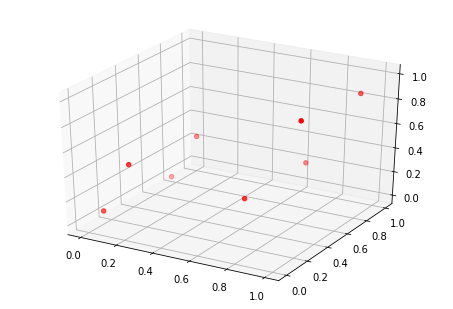

57
******************************
z output vec: tensor([[-0.9374, -1.3156, -2.5164, -0.0000, -0.9497, -1.3280, -2.5287,
          0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  2.0766,
          0.0000, -0.0000,  0.0000,  2.4329, -0.0003,  0.0012,  0.0027,
          0.0009,  0.0000,  0.0000, -0.0000,  0.0000,  0.0000,  0.0000]], device='cuda:0')
_________ORIG________


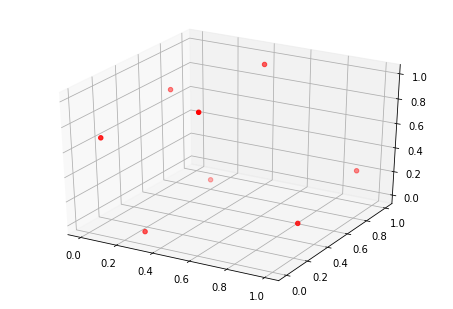

_________RECON________


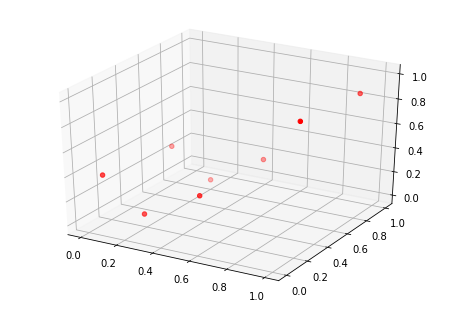

58
******************************
z output vec: tensor([[-0.8605, -1.7628, -2.4723, -0.0000, -0.8729, -1.7752, -2.4847,
          0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  1.5594,
          0.0000, -0.0000,  0.0000,  1.9158, -0.0004,  0.0012,  0.0024,
          0.0009,  0.0000,  0.0000, -0.0000,  0.0000,  0.0000,  0.0000]], device='cuda:0')
_________ORIG________


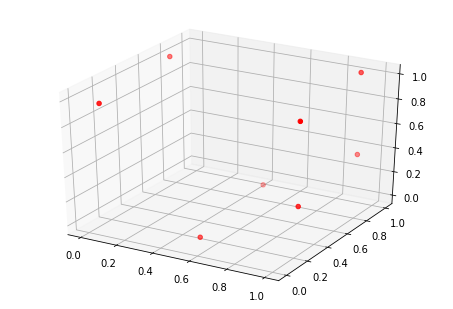

_________RECON________


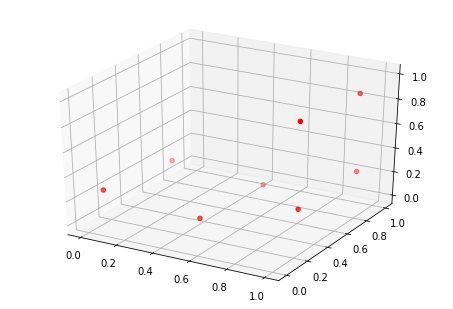

59
******************************
z output vec: tensor([[-1.0672, -0.9106, -2.5564, -0.0000, -1.0795, -0.9229, -2.5688,
          0.0000,  0.0000, -0.0000, -0.0000,  0.0000,  0.0000,  1.9512,
          0.0000,  0.0000, -0.0000,  2.3076, -0.0005,  0.0007,  0.0023,
          0.0009,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]], device='cuda:0')
_________ORIG________


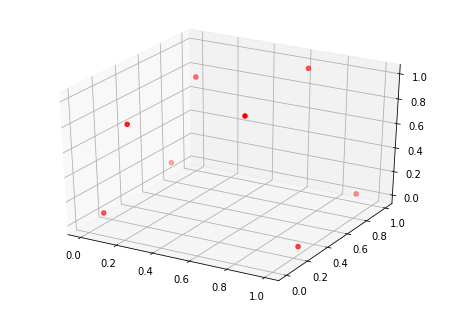

_________RECON________


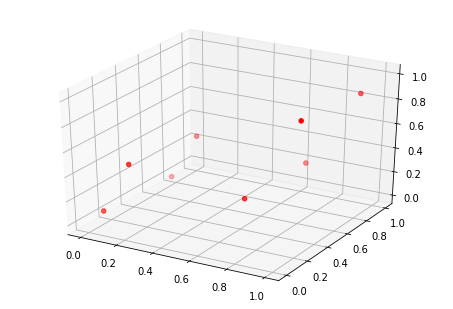

In [105]:
for i in range(50,60):
    test_reconstruct(i)

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

x = [-0.62336195, -0.68765551, -0.60835618, -0.73098087,  0.68765551,
         0.60835618,  0.73098087,  0.        ,  0.        ,  0.  ]

y =  [-0.72208285, -0.84163195,  0.61289209,  0.71019131, -0.84163195,
         0.61289209,  0.71019131,  0.6544894 ,  0.71622545, -0.79593921 ]

z =  [-0.67852008,  0.74539661, -0.76140082,  0.64347017,  0.74539661,
        -0.76140082,  0.64347017, -0.81237978,  0.65151095,  0.76727116]

#x=[(i-min(x))/(max(x)-min(x)) for i in x]

#y=[(i-min(y))/(max(y)-min(y)) for i in y]

#z=[(i-min(z))/(max(z)-min(z)) for i in z]

#verts = [list(zip(x, y,z))]
#x,y,z=zip(*verts)

trace = go.Mesh3d(x=x,y=y,z=z,color='#FFB6C1',opacity=0.50)
py.iplot([trace])

Test Performance

In [16]:
import torch.utils.data
dataset = torch.utils.data.TensorDataset(test_xy[:,:,:], test_xyz[:,:,:])
loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

cuda:0


/home/mishra/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


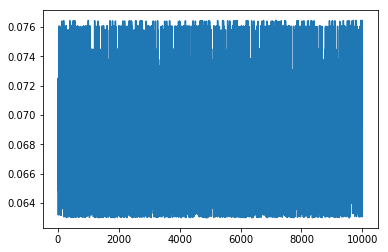

In [129]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(device)
model.to(device)
criterion = nn.L1Loss()
lr, epochs, batch_size = 1e-1 , 1 , 1
optimizer = torch.optim.SGD(model.parameters(), lr = lr )
accum=[]
i = 0
for k in range(epochs):
    localaccum = []
    for xy, xyz in iter(loader):
        i =  i+1
        local_xy = Variable(xy)
        #print(local_xy)
        local_xyz = Variable(xyz)
        local_xy = local_xy.to(device)
        local_xyz = local_xyz.to(device)
        output = model.forward(local_xy)
        output = output.to(device)
        #print("output:",output)
        #print("actual:", local_xyz[:,2,0:8])
        #loss = criterion(output, local_xyz[:,2,0:8])
        loss = criterion(output, torch.Tensor.new_zeros(output, output.size()))
        
        #print(local_xy, local_xyz)
        #if (i%100 == 0): print("network loss -> ", loss)
        #model.zero_grad()
        #loss.backward()
        #optimizer.step()
        localaccum.append(loss.data[0])
    accum.append(np.mean(localaccum))
plt.plot(localaccum);                                           

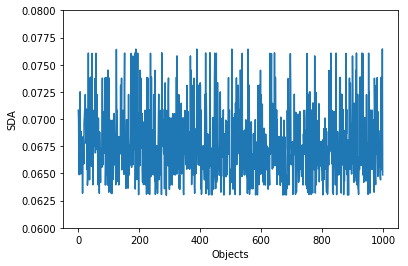

In [139]:
plt.ylabel('SDA')
plt.xlabel('Objects')
plt.ylim((0.06,0.08))
plt.plot(localaccum[0:1000])